# Exercise 4 [10.0]

**_DISCLAIMER:_** The notation used in this exercise follows the one of the Probabilistic Robotics book (refer to Chapter 5.4 in case you have doubts).

## 4.1 Inverse motion model [2.0]

The odometry model uses the _relative motion information_. The odometry readings are $u_t = [{\overline{x}}_{t-1} , {\overline{x}}_{t}]$, where $\overline{x}_{t-1}$ and  $\overline{x}_t$ are poses in a robot-internal coordinate frame (different from the map).

The function `inverse_motion_model` takes as input an odometry reading $u_t$ that consist in:

- the initial pose of the robot in the odometry coordinate frame $\overline{x}_{t-1} = [\overline{x},\overline{y},\overline{\theta}]$
- the estimated pose of the robot in the odometry coordinate frame $\overline{x}_t = [\overline{x}',\overline{y}',\overline{\theta}']$

The output is the relative motion $\delta_{rot1}, \delta_{trans}, \delta_{rot2}$.

Implement the function `inverse_motion_model` and verify that it is correct for some test input. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from ex4 import *

def deg2rad(deg):
    return deg * np.pi / 180.0

prev_pose = (2.0, 3.0, deg2rad(45))
cur_pose = (3.1, 4.1, deg2rad(62))
#cur_pose = (3,0, 4,0, deg2rad(60)) # odometry measurement (predicted new pose)

# Compute the motion parameters from the odometry reading. 
rot1, trans, rot2 = inverse_motion_model(prev_pose, cur_pose)
print("Odometry motion parameters:")
print("rot1 (rad):", rot1)
print("trans:", trans)
print("rot2 (rad):", rot2)






Odometry motion parameters:
rot1 (rad): 0.0
trans: 1.5556349186104044
rot2 (rad): 0.2967059728390362


## 4.2 Odometry-based motion model [3.0]

The function `motion_model` computes the posterior $p(x_t | u_t, x_{t-1})$ from odometry readings.

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$ _(**map** coordinate frame)_
- the hypothesized (or query) final pose $x_{t} = [x', y', \theta']$ _(**map** coordinate frame)_
- the odometry readings $u_t = [\overline{x}_{t-1} \overline{x}_t]$ _(**odometry** coordinate frame)_
- the noise parameters $\mathbf{\alpha} = [\alpha_1, \alpha_2, \alpha_3, \alpha_4]$

The output is the probability $p(x_t | u_t, x_{t-1})$

Assume that a robot starts at pose $x_0 = [2.0, 3.0, 0.0]$ in the map frame and moves according to a motion model with $\mathbf{\alpha} = [1.0, 1.0, 0.01, 0.01]$.

The robot excecutes one motion command and the odometry readings are:

1. $\overline{x}_0 = [0.0 , 0.0 , 0.0   ]$
2. $\overline{x}_1 = [0.5 , 0.0 , \pi/2 ]$

Implement the `motion_model` function and verify that it is correct for some test input. **[1.0]**

---

Consider a 150x150 grid map the world with a resolution of 0.01, centered in the original position of the robot.

Plot the posterior $p(x_t | u_t, x_{t-1})$ for all possible $[x, y]$ values from the grid. **[2.0]**

**Note that** the query input is a position, not a pose. Therefore, to plot the posterior belief over the gridmap, you can assume the term $\hat{\delta}_\mathrm{rot2}$ to be zero and, for each position, integrate over all possible orientations. This can be implemented by considering $p_3 = 1.0$ in the equations. 

Odometry motion parameters:
rot1 (rad): 0.0
trans: 1.4142135623730951
rot2 (rad): 0.26179938779914913

Motion model probability: 0.13380467990287204


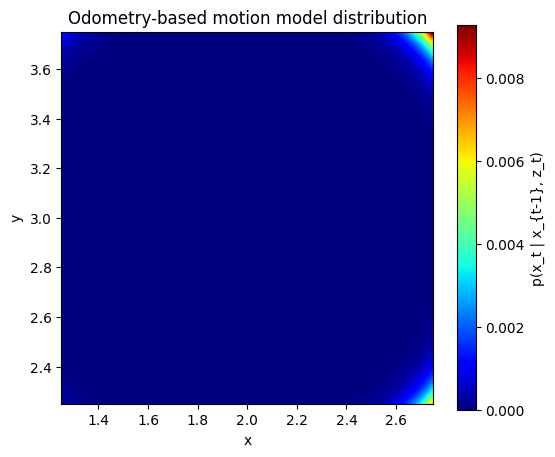

In [5]:
# Import necessary libraries and the motion model functions
import numpy as np
import matplotlib.pyplot as plt
from ex4 import inverse_motion_model, motion_model, sample_motion_model

# Define a helper function to convert degrees to radians (for clarity)
def deg2rad(deg):
    return deg * np.pi / 180.0

# Define an initial pose and an odometry reading.
# Here, poses are represented as (x, y, theta) where theta is in radians.
prev_pose = (2.0, 3.0, deg2rad(45))   # initial pose
odom = (3.0, 4.0, deg2rad(60))         # odometry measurement (predicted new pose)

# Compute the motion parameters from the odometry reading.
rot1, trans, rot2 = inverse_motion_model(prev_pose, odom)
print("Odometry motion parameters:")
print("rot1 (rad):", rot1)
print("trans:", trans)
print("rot2 (rad):", rot2)

# Define a hypothetical actual current pose (for likelihood evaluation)
cur_pose = (3.1, 4.1, deg2rad(62))

# Define noise parameters alpha.
# These are typically small positive numbers that describe the uncertainty.
alpha = [1.0, 1.0, 0.01, 0.01]

# Compute the likelihood of the actual motion given the odometry reading.
p = motion_model(cur_pose, prev_pose, odom, alpha)
print("\nMotion model probability:", p)




# -------------------------------------------------------------------------
# 2) Build a 2D grid around the original position (2.0, 3.0) with resolution
#    0.01. We'll create a 150 x 150 grid that spans +/- 0.75 around (2.0,3.0).
# -------------------------------------------------------------------------
grid_size = 150
res = 0.01
half_span = (grid_size * res) / 2.0  # 150 * 0.01 / 2 = 0.75

x_vals = np.linspace(prev_pose[0] - half_span, prev_pose[0] + half_span, grid_size)
y_vals = np.linspace(prev_pose[1] - half_span, prev_pose[1] + half_span, grid_size)

# We will fix theta = 0 for the sake of a 2D plot. If you want to integrate
# over all possible thetas, you'd have to do a 3D loop or another approach.
fixed_theta = 0.0

# Initialize an array to store the motion model probabilities for each cell
p_map = np.zeros((grid_size, grid_size))

# -------------------------------------------------------------
# 3) Evaluate the motion model over every (x, y) in the 2D grid
# -------------------------------------------------------------
for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        # The "candidate" current pose x_t is (x, y, fixed_theta).
        cur_pose = (x, y, fixed_theta)
        
        # Evaluate the probability p(x_t | x_{t-1}, z_t)
        # motion_model(cur_pose, prev_pose, odom, alpha) must be defined
        # in your ex4.py as requested in the assignment.
        p_map[j, i] = motion_model(cur_pose, prev_pose, odom, alpha)

# ---------------------------------------------------------
# 4) (Optional) Normalize the 2D probabilities so that the
#    sum over the grid is 1.0 (for a nice heatmap display).
# ---------------------------------------------------------
p_sum = np.sum(p_map)
if p_sum > 0:
    p_map /= p_sum

# -----------------------------------
# 5) Plot the resulting probability map
# -----------------------------------
plt.figure(figsize=(6,5))
# For a heatmap, we can use imshow. We set origin='lower' so that the
# [0,0] index is shown at the bottom-left. We also specify the extent
# so the axes match our x_vals and y_vals in real units.
plt.imshow(p_map, origin='lower',
           extent=[x_vals[0], x_vals[-1], y_vals[0], y_vals[-1]],
           cmap='jet')
plt.colorbar(label='p(x_t | x_{t-1}, z_t)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Odometry-based motion model distribution')
plt.show()


## 4.3 Sample odometry motion model [2.0]

The `motion_model` requires high computation complexity and does not scale well to large real-world environments. 

One effective approach to approximate $p(x_t | u_t, x_{t-1})$ is to use **sampling**.

The `sample_motion_model` function defines the sampling-based odometry motion model. 

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$ _(**map** coordinate frame)_
- the odometry readings $u_t = [\overline{x}_{t-1} \overline{x}_t]$ _(**odometry** coordinate frame)_
- the noise parameters $\mathbf{\alpha} = [\alpha_1, \alpha_2, \alpha_3, \alpha_4]$

The output is a new (sampled) pose predicted by the motion model.

Implement the `sample_motion_model` function and verify that it is correct for some test input. 

Odometry motion parameters:
rot1 (rad): 0.0
trans: 1.4142135623730951
rot2 (rad): 0.26179938779914913

Motion model probability: 0.13380467990287204


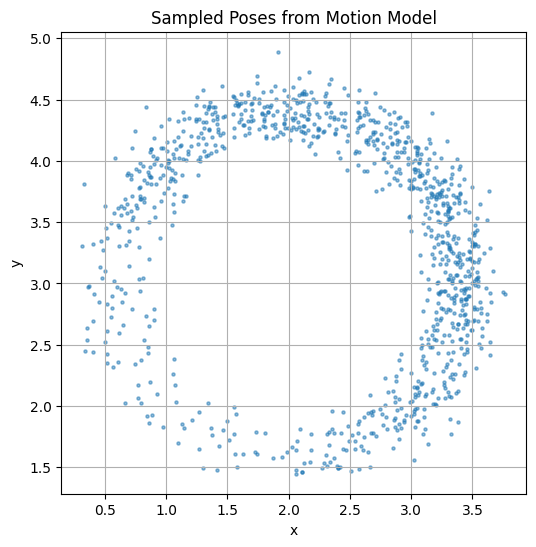

In [3]:
# Import necessary libraries and the motion model functions
import numpy as np
import matplotlib.pyplot as plt
from ex4 import inverse_motion_model, motion_model, sample_motion_model

# Define a helper function to convert degrees to radians (for clarity)
def deg2rad(deg):
    return deg * np.pi / 180.0

# Define an initial pose and an odometry reading.
# Here, poses are represented as (x, y, theta) where theta is in radians.
prev_pose = (2.0, 3.0, deg2rad(45))   # initial pose
odom = (3.0, 4.0, deg2rad(60))         # odometry measurement (predicted new pose)

# Define a hypothetical actual current pose (for likelihood evaluation)
cur_pose = (3.1, 4.1, deg2rad(62))

# Compute the motion parameters from the odometry reading.
rot1, trans, rot2 = inverse_motion_model(prev_pose, odom)
print("Odometry motion parameters:")
print("rot1 (rad):", rot1)
print("trans:", trans)
print("rot2 (rad):", rot2)

# Define noise parameters alpha.
# These are typically small positive numbers that describe the uncertainty.
alpha = [1.0, 1.0, 0.01, 0.01]

# Compute the likelihood of the actual motion given the odometry reading.
p = motion_model(cur_pose, prev_pose, odom, alpha)
print("\nMotion model probability:", p)

# Generate multiple samples from the motion model to see the spread of possible poses.
num_samples = 1000
samples = []
for _ in range(num_samples):
    sample_pose = sample_motion_model(prev_pose, odom, alpha)
    samples.append(sample_pose)

samples = np.array(samples)

# Plot the sampled poses.
plt.figure(figsize=(6,6))
plt.scatter(samples[:,0], samples[:,1], s=5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sampled Poses from Motion Model")
plt.axis('equal')
plt.grid(True)
plt.show()


## 4.4 Evaluate sample odometry motion model  [3.0]

Assume that a robot starts at pose $x_0 = [2.0, 3.0, 0.0]$ in the map frame and moves according to a motion model with $\mathbf{\alpha} = [0.1, 0.1, 0.01, 0.01]$.

The robot obtains the following odometry readings:

1. $\overline{x}_0 = [0.0 , 0.0 , 0.0   ]$
2. $\overline{x}_1 = [0.5 , 0.0 , \pi/2 ]$
3. $\overline{x}_2 = [0.5 , 0.5 , 0.0   ]$
4. $\overline{x}_3 = [1.0 , 0.5 , 0.0   ]$
5. $\overline{x}_4 = [1.0 , 1.5 , \pi/2 ]$
6. $\overline{x}_5 = [1.0 , 2.5 , \pi/2 ]$

Evaluate the `sample_motion_model` by considering 1000 samples and plot the resulting positions for each sample in one unique plot.

Odometry motion parameters:
rot1 (rad): 0.0
trans: 1.4142135623730951
rot2 (rad): 0.26179938779914913

Motion model probability: 0.13380467990287204


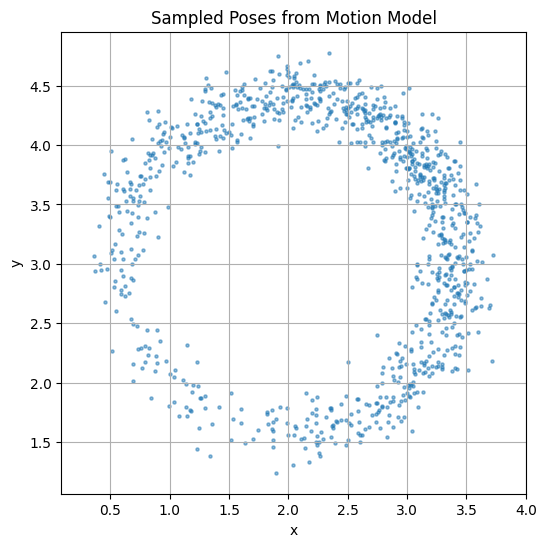

In [6]:
# Import necessary libraries and the motion model functions
import numpy as np
import matplotlib.pyplot as plt
from ex4 import inverse_motion_model, motion_model, sample_motion_model

# Define a helper function to convert degrees to radians (for clarity)
def deg2rad(deg):
    return deg * np.pi / 180.0

# Define an initial pose and an odometry reading.
# Here, poses are represented as (x, y, theta) where theta is in radians.
prev_pose = (2.0, 3.0, deg2rad(45))   # initial pose
odom = (3.0, 4.0, deg2rad(60))         # odometry measurement (predicted new pose)

# Define a hypothetical actual current pose (for likelihood evaluation)
cur_pose = (3.1, 4.1, deg2rad(62))

# Compute the motion parameters from the odometry reading.
rot1, trans, rot2 = inverse_motion_model(prev_pose, odom)
print("Odometry motion parameters:")
print("rot1 (rad):", rot1)
print("trans:", trans)
print("rot2 (rad):", rot2)

# Define noise parameters alpha.
# These are typically small positive numbers that describe the uncertainty.
alpha = [1.0, 1.0, 0.01, 0.01]

# Compute the likelihood of the actual motion given the odometry reading.
p = motion_model(cur_pose, prev_pose, odom, alpha)
print("\nMotion model probability:", p)

# Generate multiple samples from the motion model to see the spread of possible poses.
num_samples = 1000
samples = []
for _ in range(num_samples):
    sample_pose = sample_motion_model(prev_pose, odom, alpha)
    samples.append(sample_pose)

samples = np.array(samples)

# Plot the sampled poses.
plt.figure(figsize=(6,6))
plt.scatter(samples[:,0], samples[:,1], s=5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sampled Poses from Motion Model")
plt.axis('equal')
plt.grid(True)
plt.show()


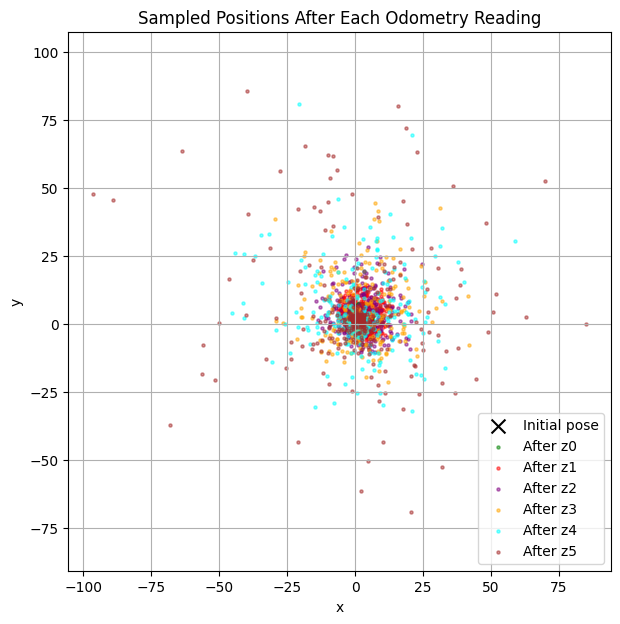

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ex4 import sample_motion_model

# Noise parameters
alpha = [0.1, 0.1, 0.01, 0.01]

# Initial pose: x0 = [2.0, 3.0, 0.0]
x0 = (2.0, 3.0, 0.0)

# Odometry readings z_k
odometries = [
    (0.0, 0.0, 0.0),      # z0
    (0.0, 0.5, 0.0),      # z1
    (0.5, 0.5, 0.0),      # z2
    (1.0, 0.5, 0.0),      # z3
    (1.0, 1.0, np.pi/2),  # z4
    (1.0, 2.5, np.pi/2)   # z5
]

# Number of samples to draw per odometry reading
N = 1000

# Keep track of particles (samples). Start all particles at x0.
particles = np.array([x0]*N)  # shape: (1000, 3)

# Prepare a figure
plt.figure(figsize=(7,7))

# A small set of colors for plotting each step distinctly
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown']

# Plot the initial pose
plt.scatter([x0[0]], [x0[1]], color='black', marker='x', s=100, label='Initial pose')

# For each odometry reading, sample new poses and plot them
for k, odom in enumerate(odometries, start=1):
    new_particles = []
    for i in range(N):
        new_pose = sample_motion_model(tuple(particles[i]), odom, alpha)
        new_particles.append(new_pose)
    new_particles = np.array(new_particles)

    # Plot these 1000 samples
    c = colors[k % len(colors)]
    plt.scatter(new_particles[:, 0], new_particles[:, 1],
                s=5, alpha=0.5, color=c, label=f'After z{k-1}')

    # Update our distribution to move on to the next step
    particles = new_particles

# Format and display
plt.title('Sampled Positions After Each Odometry Reading')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
